In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

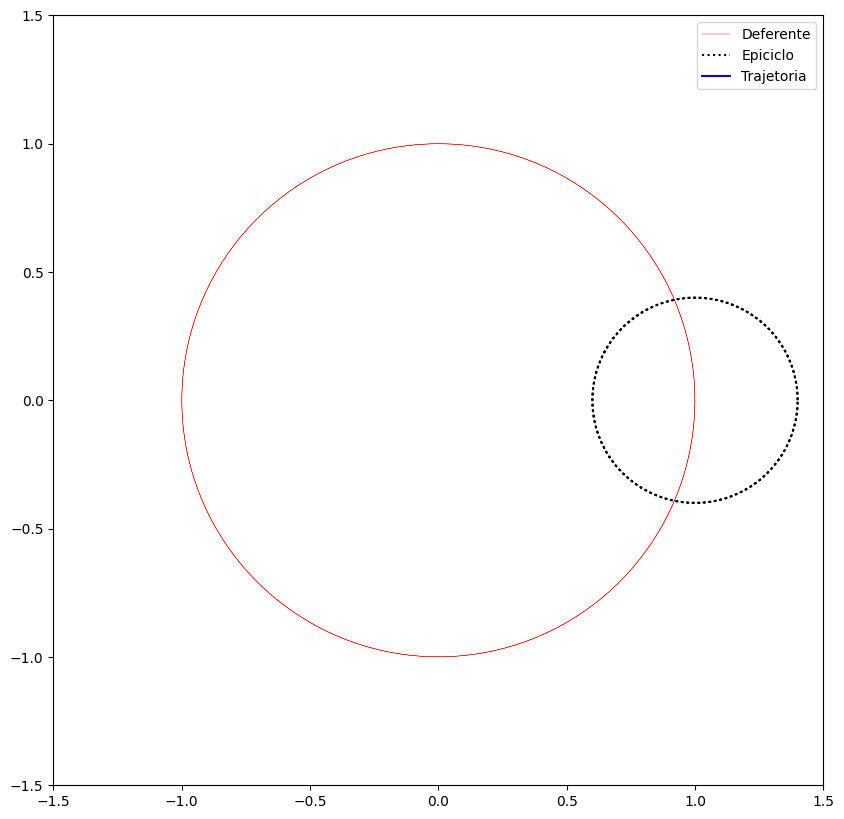

In [4]:
#QUESTÂO 2 - Lista 1
#Gera um gif com uma animação de epiciclos 
fig, ax = plt.subplots()

#Dado o raio  deferente = 1, este são os dados relativos do epiciclo:
raio_epiciclo = 0.4
vel_epiciclo = 3 
n_frames = 150

#Retorna ponto do deferente dado angulo do arco
def def_location(ang):
    return np.array([np.cos(ang),np.sin(ang)])

#Retorna ponto do epiciclo dado raio,angulo do arco e velocidade da orbita do epiciclo
def epi_location(r,ang,vel):
    ang2 = vel*ang
    return np.array((r*np.cos(ang2),r*np.sin(ang2)) + def_location(ang))

#Construindo pontos do deferente
a1 = np.linspace(0,4*np.pi,n_frames)
xy_def = [def_location(a) for a in a1]
deferente = ax.plot(*zip(*xy_def),c='r',lw=0.3,label="Deferente")

#Criando orbitas do epiciclo
orbits=[]
for centro in xy_def:
    orbits.append([p*raio_epiciclo+centro for p in xy_def])
epiciclo = ax.plot(*zip(*orbits[0]),c='k',ls='dotted',label="Epiciclo")[0]

#Plotando pontos do epiciclo
loc = [epi_location(raio_epiciclo,a,vel_epiciclo) for a in a1]
trajeto = ax.plot(*zip(loc[0]),c='b',label="Trajetoria")[0]

#Construindo animação
ax.set_aspect('equal')
ax.set(xlim=[-1.5, 1.5], ylim=[-1.5, 1.5])
ax.legend()
fig.set_figwidth(10)
fig.set_figheight(10)

def update(frame_num):
    #Mudando epiciclo
    epiciclo.set_data(*zip(*orbits[frame_num]))
    # atualizando plotagem da linha:
    if(frame_num==0): frame_num+=1
    trajeto.set_data(list(zip(*loc[:frame_num])))
    return epiciclo

ani = animation.FuncAnimation(fig=fig, func=update, frames=n_frames, interval=50)
plt.show()
ani.save(filename=os.getcwd() +"\\epiciclos_ptolomeu.gif", writer="pillow")


Eixo da segunda esfera sob o vetor [-0.226055, -0.97300494, 0.04648132]:


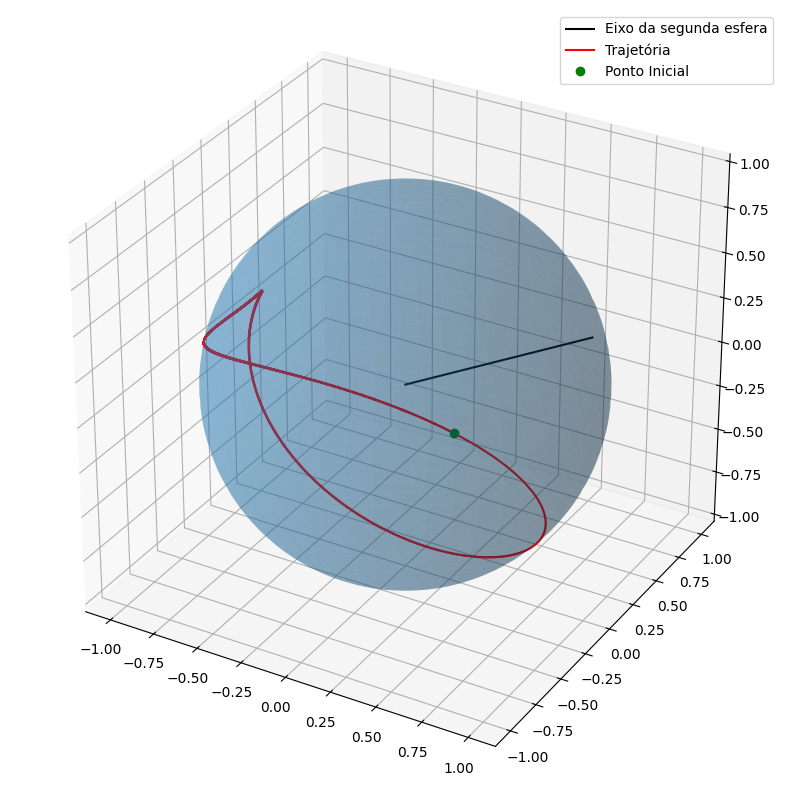

In [16]:
#Questão 3

#Estratégia: Usar a parametrização de eixo-ângulo para obter duas matrizes de rotação, e aplicá-las a um ponto, uma após a outra.

#Dados do sistema:
eixo1 = np.array([0,0,1])
    ##Caso queira o eixo da segunda esfera aleatorio,descomente:
# phi = np.random.rand() * 2 * np.pi
# theta = np.random.rand() * np.pi
# eixo2 = np.array([np.sin(theta)*np.cos(phi),np.sin(phi)*np.sin(theta),np.cos(theta)]) 
eixo2 = [-0.226055,   -0.97300494,  0.04648132]
print("Eixo da segunda esfera sob o vetor {}:".format(eixo2))
omega = 0.009
    ##Randomizando ponto inicial
phi = np.random.rand() * 2 * np.pi
theta = np.random.rand() * np.pi
ponto_inicial = np.array([np.sin(theta)*np.cos(phi),np.sin(phi)*np.sin(theta),np.cos(theta)])

#Função: cria matriz de rotação dado eixo e velocidade angular, segundo a fórmula de rotação de Rodrigues (https://mathworld.wolfram.com/RodriguesRotationFormula.html)
def rott_matrix(eixo,omega):
    K = np.array([
        [0,-eixo[2],eixo[1]],
        [eixo[2],0,-eixo[0]],
        [-eixo[1],eixo[0],0]
    ])
    return (np.identity(3) + np.sin(omega)*K +
            (1 - np.cos(omega)) * np.linalg.matrix_power(K,2)) 


    ##Criando pontos da trajetoria:
r1 = rott_matrix(eixo1,omega)
pontos = [ponto_inicial]
for i in range(0,1000):
   #1a rotação
   pontos.append(r1.dot(pontos[-1]))
   #2a rotação
   eixo2 = r1.dot(eixo2)
   pontos.append(rott_matrix(eixo2,-omega).dot(pontos[-1]))



#   PLOTS

fig = plt.figure()
ax = fig.add_subplot(projection='3d')

phi_values = np.linspace(0, 2*np.pi, 100)
theta_values = np.linspace(0, np.pi, 100)

x = np.outer(np.cos(phi_values), np.sin(theta_values))
y = np.outer(np.sin(phi_values), np.sin(theta_values))
z = np.outer(np.ones(np.size(theta_values)), np.cos(theta_values))
teste = np.array([1,2,3])
#plotando esfera e eixo
ax.plot_surface(x, y, z,alpha=0.3)
ax.plot(*np.column_stack(([0,0,0],eixo2)),'k',label="Eixo da segunda esfera")
ax.plot(*np.column_stack((pontos)),'r',label="Trajetória")
ax.plot(*ponto_inicial,'go',label = "Ponto Inicial")
# Set an equal aspect ratio
ax.set_aspect('equal')
plt.legend()
fig.set_figwidth(10)
fig.set_figheight(10)
plt.show()
